In [1]:
import pandas as pd

# Convert the GitHub link to a raw URL
url = "https://raw.githubusercontent.com/Metricam/Public_data/master/MARKET_Car_Prices.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(df.head())


          make fuel_type aspiration num_of_doors   body_style drive_wheels  \
0  alfa-romero       gas        std          two  convertible          rwd   
1  alfa-romero       gas        std          two  convertible          rwd   
2  alfa-romero       gas        std          two    hatchback          rwd   
3         audi       gas        std         four        sedan          fwd   
4         audi       gas        std         four        sedan          4wd   

  engine_location  wheel_base  length  width  ...  engine_size  fuel_system  \
0           front        88.6   168.8   64.1  ...          130         mpfi   
1           front        88.6   168.8   64.1  ...          130         mpfi   
2           front        94.5   171.2   65.5  ...          152         mpfi   
3           front        99.8   176.6   66.2  ...          109         mpfi   
4           front        99.4   176.6   66.4  ...          136         mpfi   

   bore stroke  compression_ratio horsepower  peak_rpm  

In [2]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               205 non-null    object 
 1   fuel_type          205 non-null    object 
 2   aspiration         205 non-null    object 
 3   num_of_doors       203 non-null    object 
 4   body_style         205 non-null    object 
 5   drive_wheels       205 non-null    object 
 6   engine_location    205 non-null    object 
 7   wheel_base         205 non-null    float64
 8   length             205 non-null    float64
 9   width              205 non-null    float64
 10  height             205 non-null    float64
 11  curb_weight        205 non-null    int64  
 12  engine_type        205 non-null    object 
 13  num_of_cylinders   205 non-null    object 
 14  engine_size        205 non-null    int64  
 15  fuel_system        205 non-null    object 
 16  bore               201 non

In [3]:
cylinder_map = {'two': 2, 'four': 4,'six':6,'eight':8,'three':3,'twelve':12,'five':5}
df['num_of_cylinders'] = df['num_of_cylinders'].map(cylinder_map)

In [4]:
df

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


# Imputing numeric missing values with the mean, categorical most frequent


In [5]:
def impute_missing_values(df):
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            most_frequent = df[col].mode().iloc[0] if not df[col].mode().empty else None
            df[col].fillna(most_frequent, inplace=True)
        else:
            mean_value = df[col].mean()
            df[col].fillna(mean_value, inplace=True)
    return df

df = impute_missing_values(df)

<ipython-input-5-75048ff4c23b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(most_frequent, inplace=True)
<ipython-input-5-75048ff4c23b>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [6]:
print(df.isnull().sum())

make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64


# Box plots of price, engine_size, horsepower, curb_weight


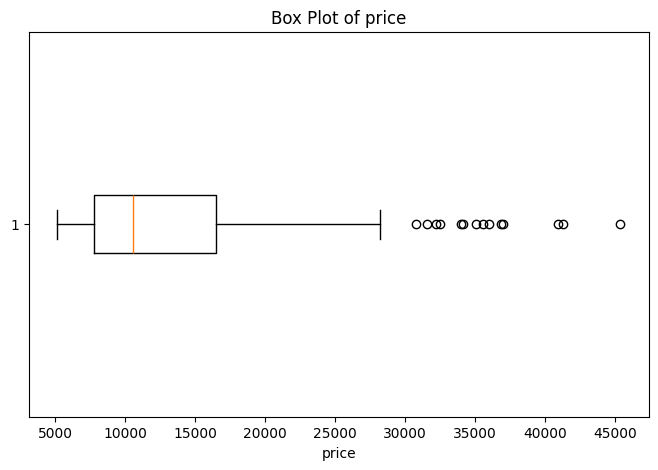

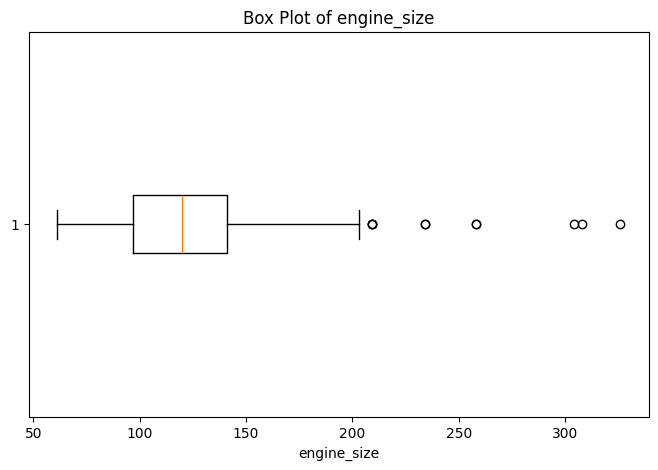

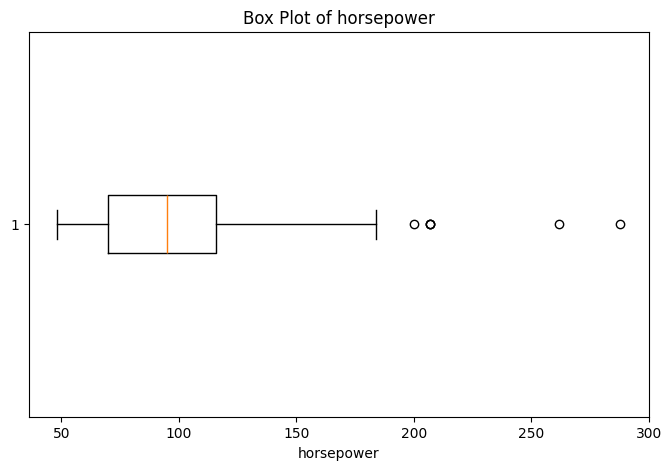

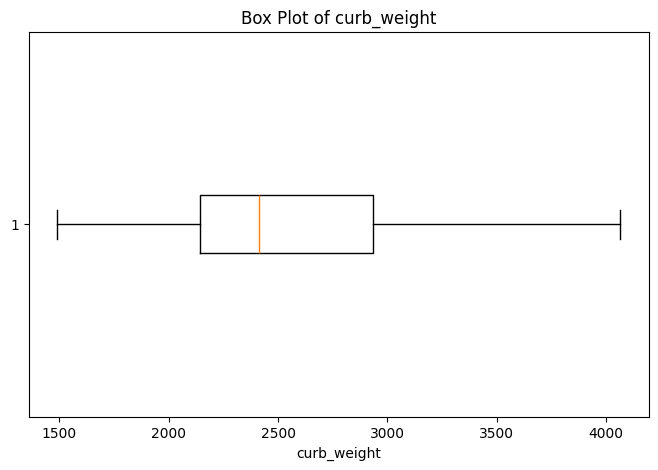

In [7]:

import pandas as pd
import matplotlib.pyplot as plt

important_columns = ['price', 'engine_size', 'horsepower', 'curb_weight']

for col in important_columns:
    plt.figure(figsize=(8, 5))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

# Detecing outliers based on if they are out [lower_bound,upper_range] range or not

Column: price
  Lower Bound: -5280.00
  Upper Bound: 29568.00
  Number of outliers: 14


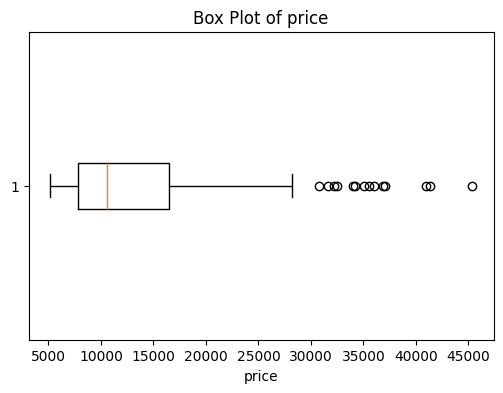

Column: engine_size
  Lower Bound: 31.00
  Upper Bound: 207.00
  Number of outliers: 10


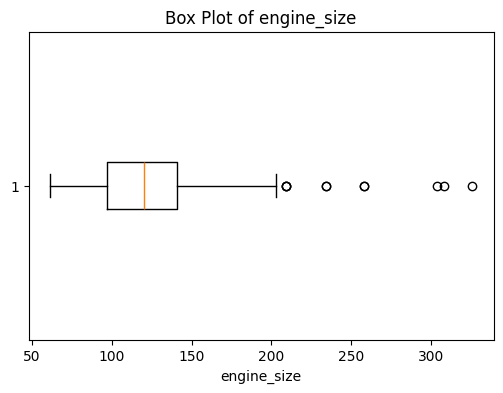

Column: horsepower
  Lower Bound: 1.00
  Upper Bound: 185.00
  Number of outliers: 6


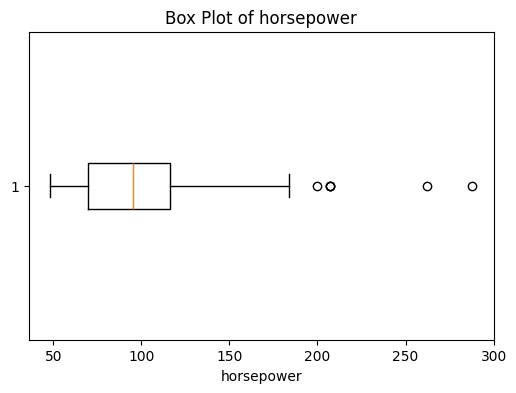

Column: curb_weight
  Lower Bound: 960.00
  Upper Bound: 4120.00
  Number of outliers: 0


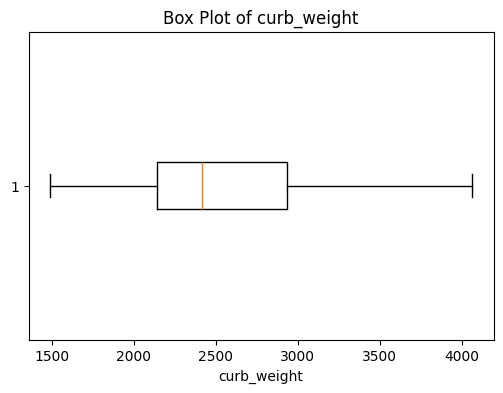

In [8]:
import pandas as pd
import matplotlib.pyplot as plt



def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return lower_bound, upper_bound, outliers

important_columns = ['price', 'engine_size', 'horsepower', 'curb_weight']

for col in important_columns:
    lb, ub, outliers = detect_outliers(df, col)
    print(f"Column: {col}")
    print(f"  Lower Bound: {lb:.2f}")
    print(f"  Upper Bound: {ub:.2f}")
    print(f"  Number of outliers: {len(outliers)}")

    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)
    plt.show()


# Histogram of different features and some statistics

             count          mean          std     min     25%      50%  \
price        205.0  13207.129353  7868.768212  5118.0  7788.0  10595.0   
horsepower   205.0    104.256158    39.519211    48.0    70.0     95.0   
engine_size  205.0    126.907317    41.642693    61.0    97.0    120.0   
curb_weight  205.0   2555.565854   520.680204  1488.0  2145.0   2414.0   

                 75%      max   median  
price        16500.0  45400.0  10595.0  
horsepower     116.0    288.0     95.0  
engine_size    141.0    326.0    120.0  
curb_weight   2935.0   4066.0   2414.0  


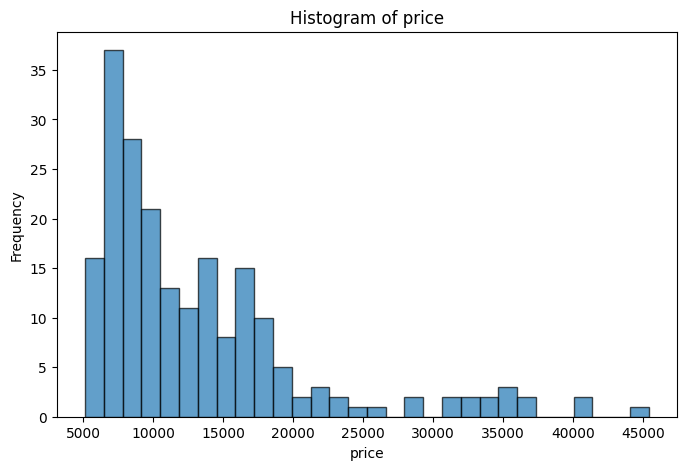

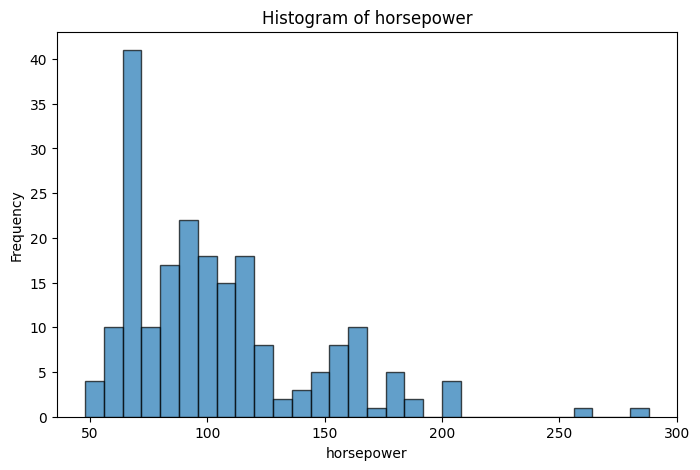

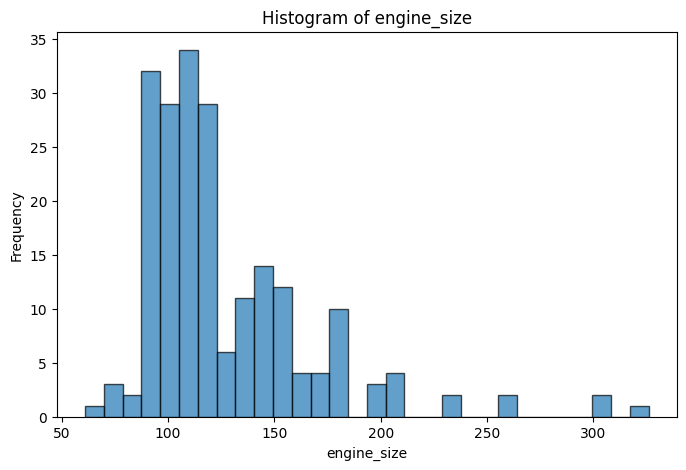

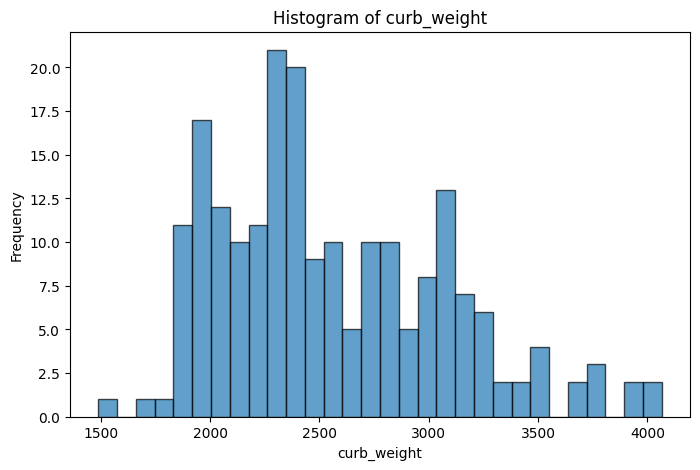

In [9]:
columns_to_analyze = ["price", "horsepower", "engine_size", "curb_weight"]

summary_stats = df[columns_to_analyze].describe().T
summary_stats["median"] = df[columns_to_analyze].median()

print(summary_stats)

for col in columns_to_analyze:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col].dropna(), bins=30, edgecolor="black", alpha=0.7)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [10]:
df['body_style'].value_counts()

,count
body_style,
sedan,96
hatchback,70
wagon,25
hardtop,8
convertible,6


# Barplots of categorical columns

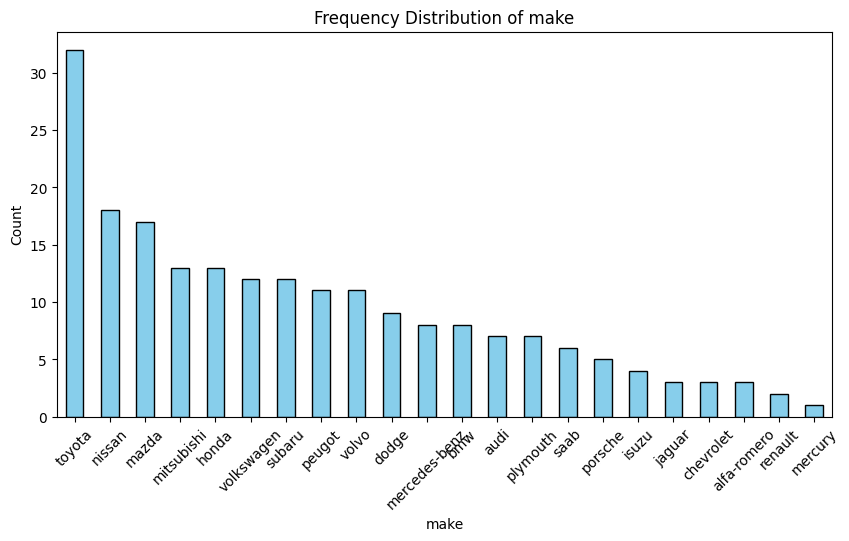

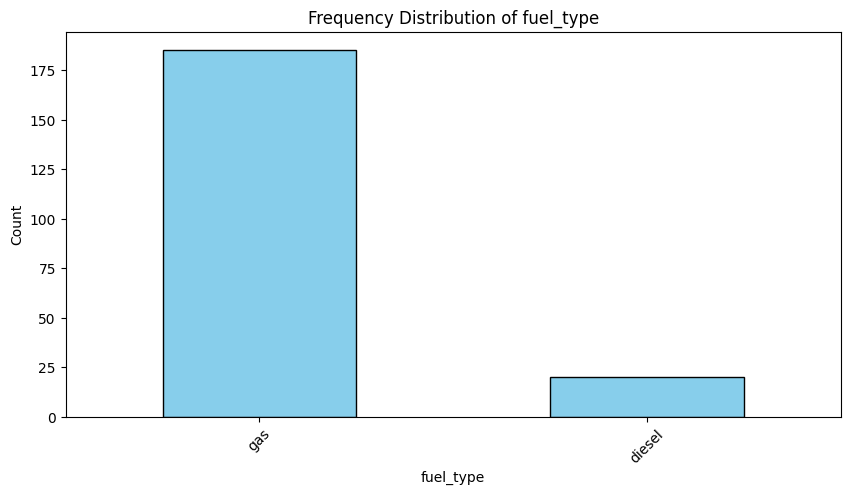

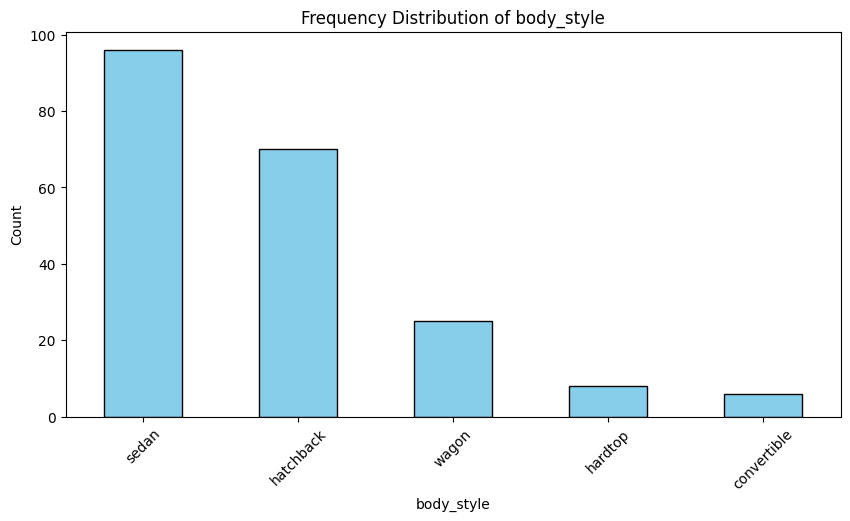

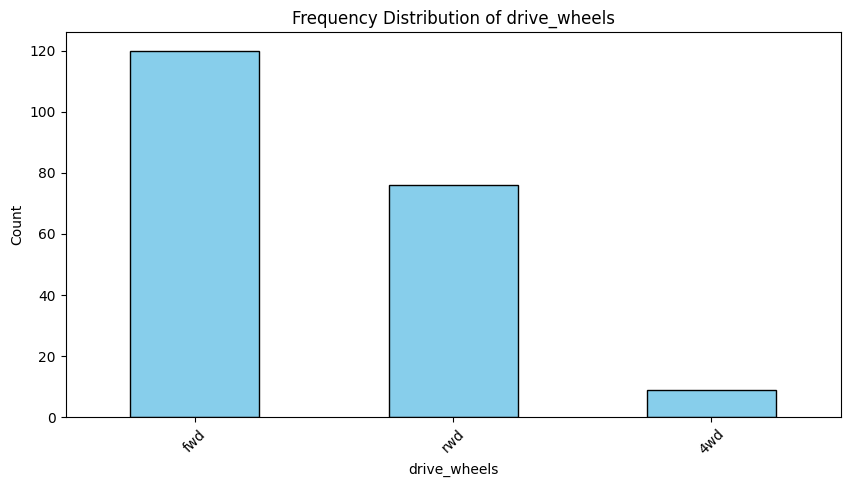

In [11]:
categorical_columns = ["make", "fuel_type", "body_style", "drive_wheels"]

for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    df[col].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")
    plt.title(f"Frequency Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

In [12]:
df.columns

Index(['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style',
       'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

# Understanding how horsepower,engine_size, effects price

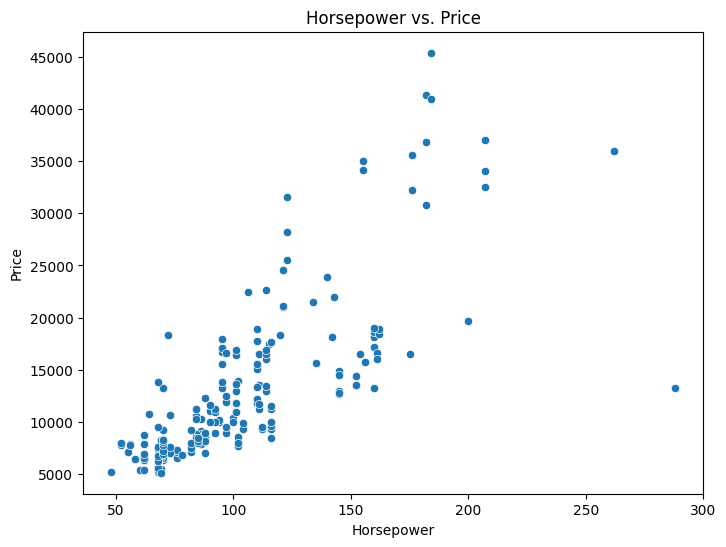

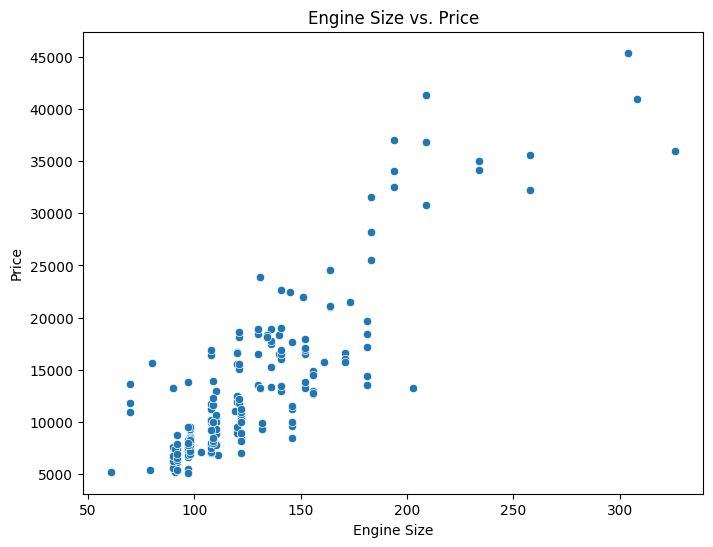

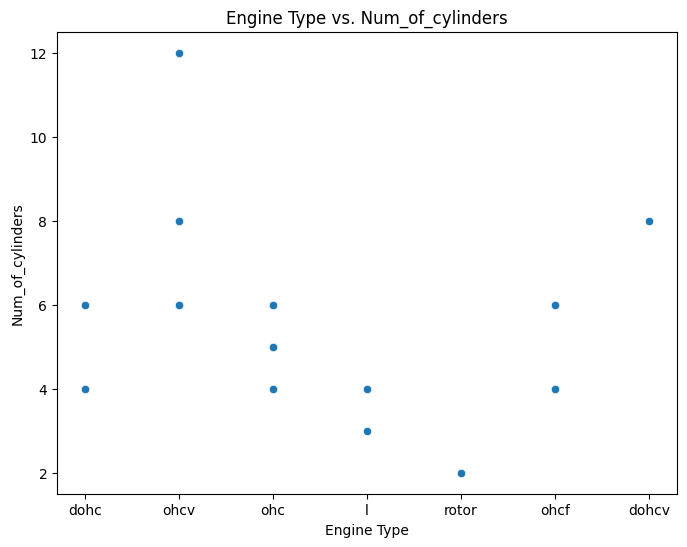

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='horsepower', y='price', data=df)
plt.title('Horsepower vs. Price')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()

# 2. Engine Size vs. Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='engine_size', y='price', data=df)
plt.title('Engine Size vs. Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='engine_type', y='num_of_cylinders', data=df)
plt.title('Engine Type vs. Num_of_cylinders')
plt.xlabel('Engine Type')
plt.ylabel('Num_of_cylinders')
plt.show()

# Correlation Heatmap

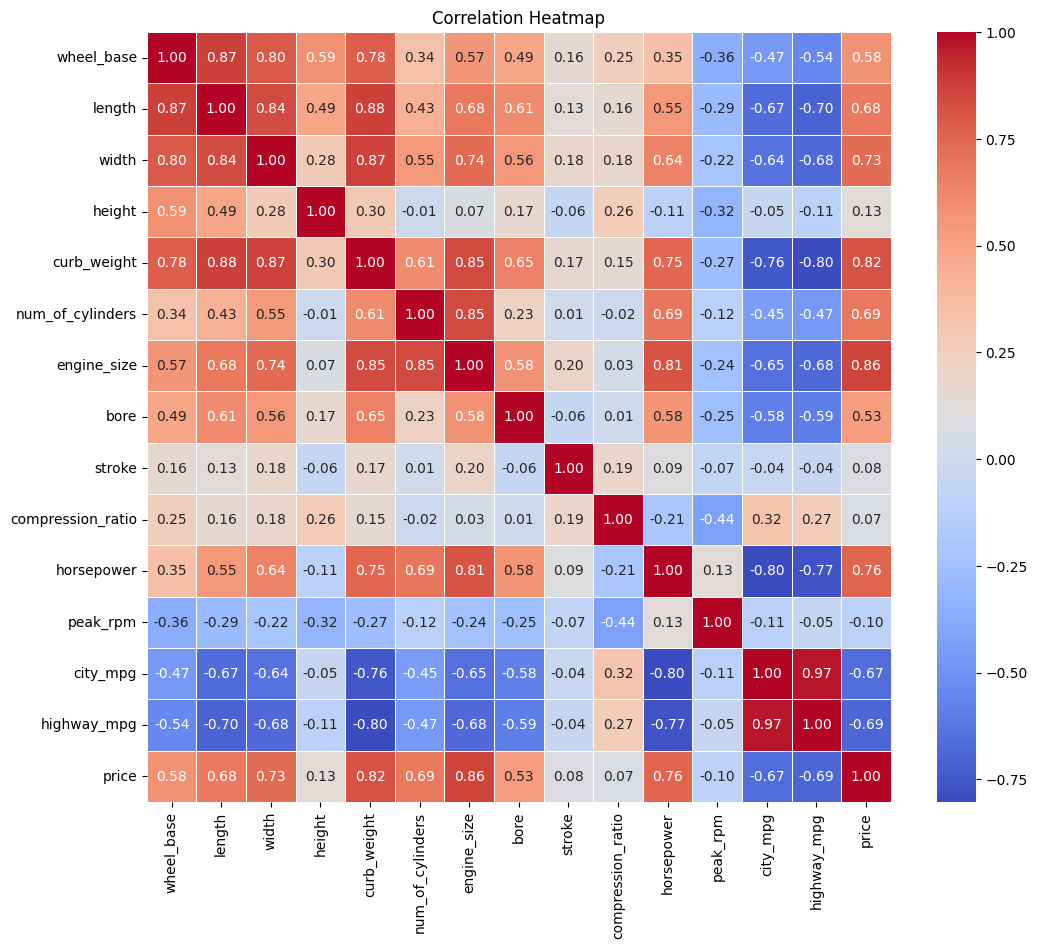

In [14]:
numerical_df = df.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# How different features affect price

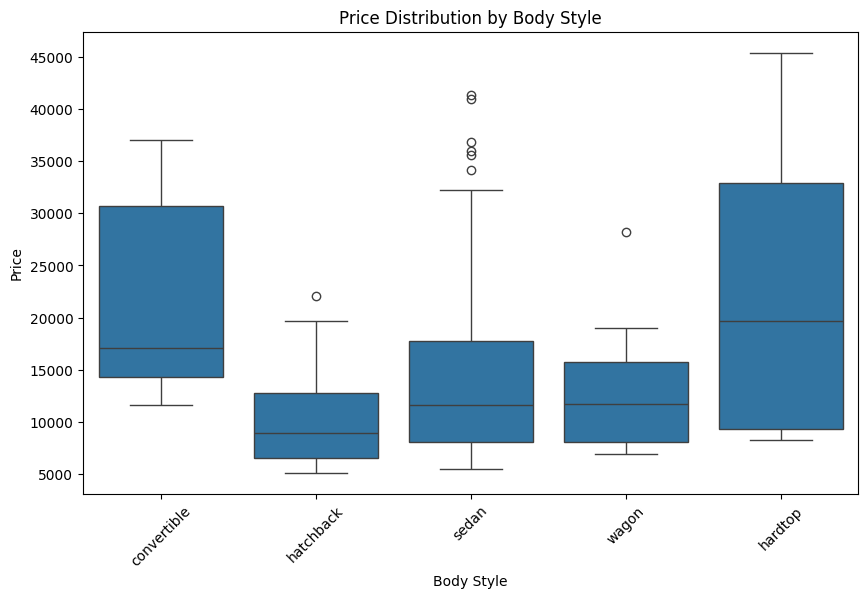

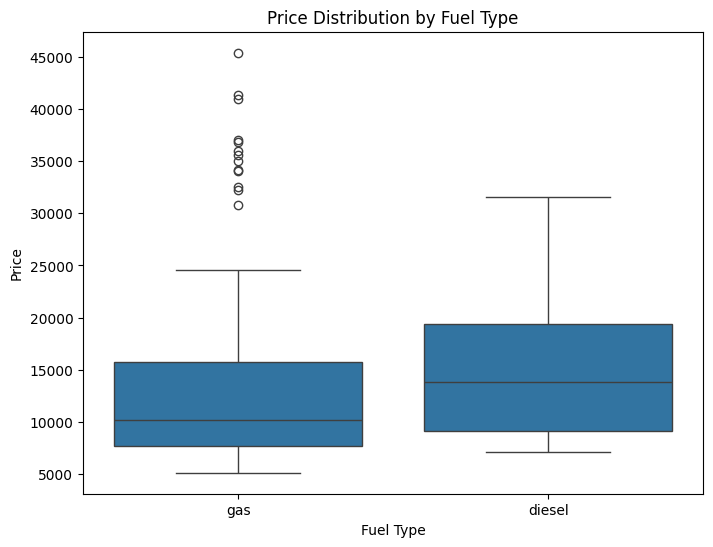

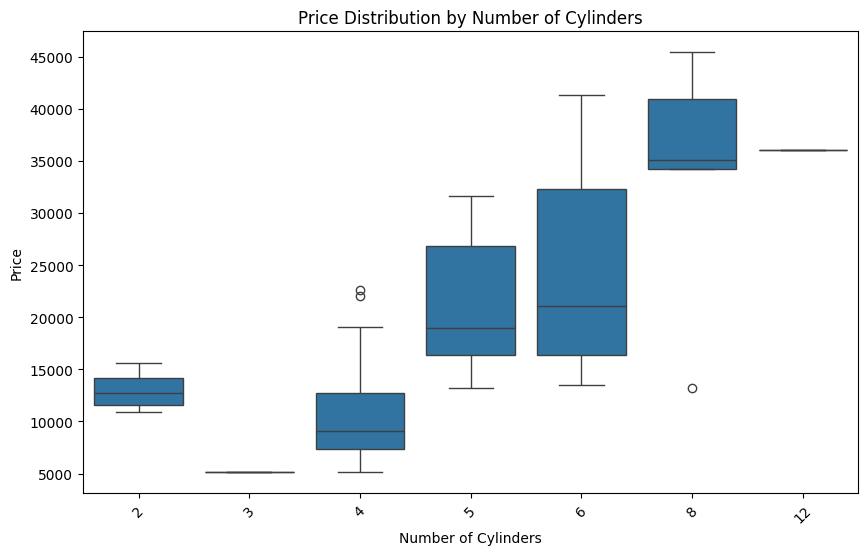

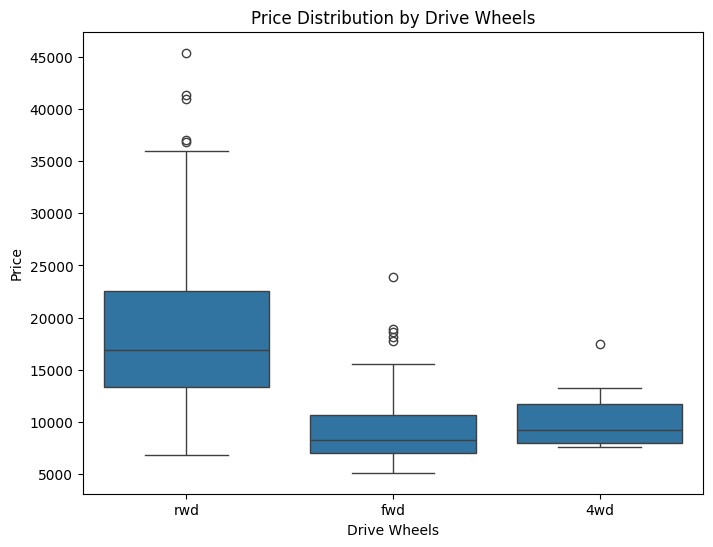

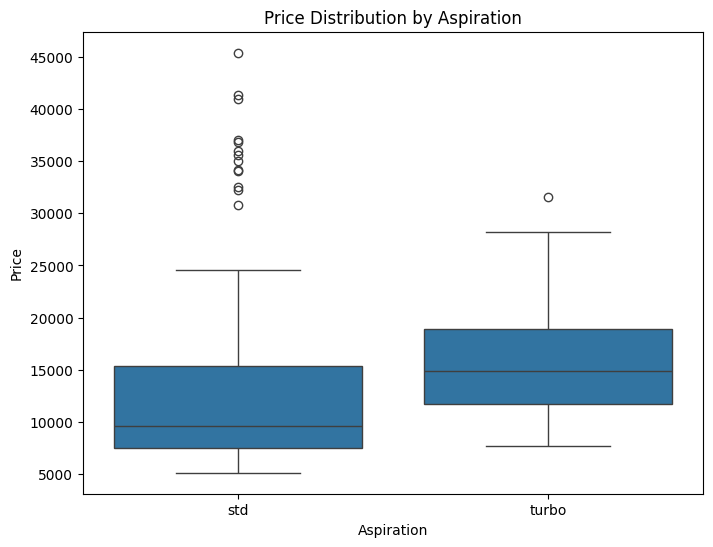

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='body_style', y='price', data=df)
plt.title('Price Distribution by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='fuel_type', y='price', data=df)
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='num_of_cylinders', y='price', data=df)
plt.title('Price Distribution by Number of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='drive_wheels', y='price', data=df)
plt.title('Price Distribution by Drive Wheels')
plt.xlabel('Drive Wheels')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='aspiration', y='price', data=df)
plt.title('Price Distribution by Aspiration')
plt.xlabel('Aspiration')
plt.ylabel('Price')
plt.show()

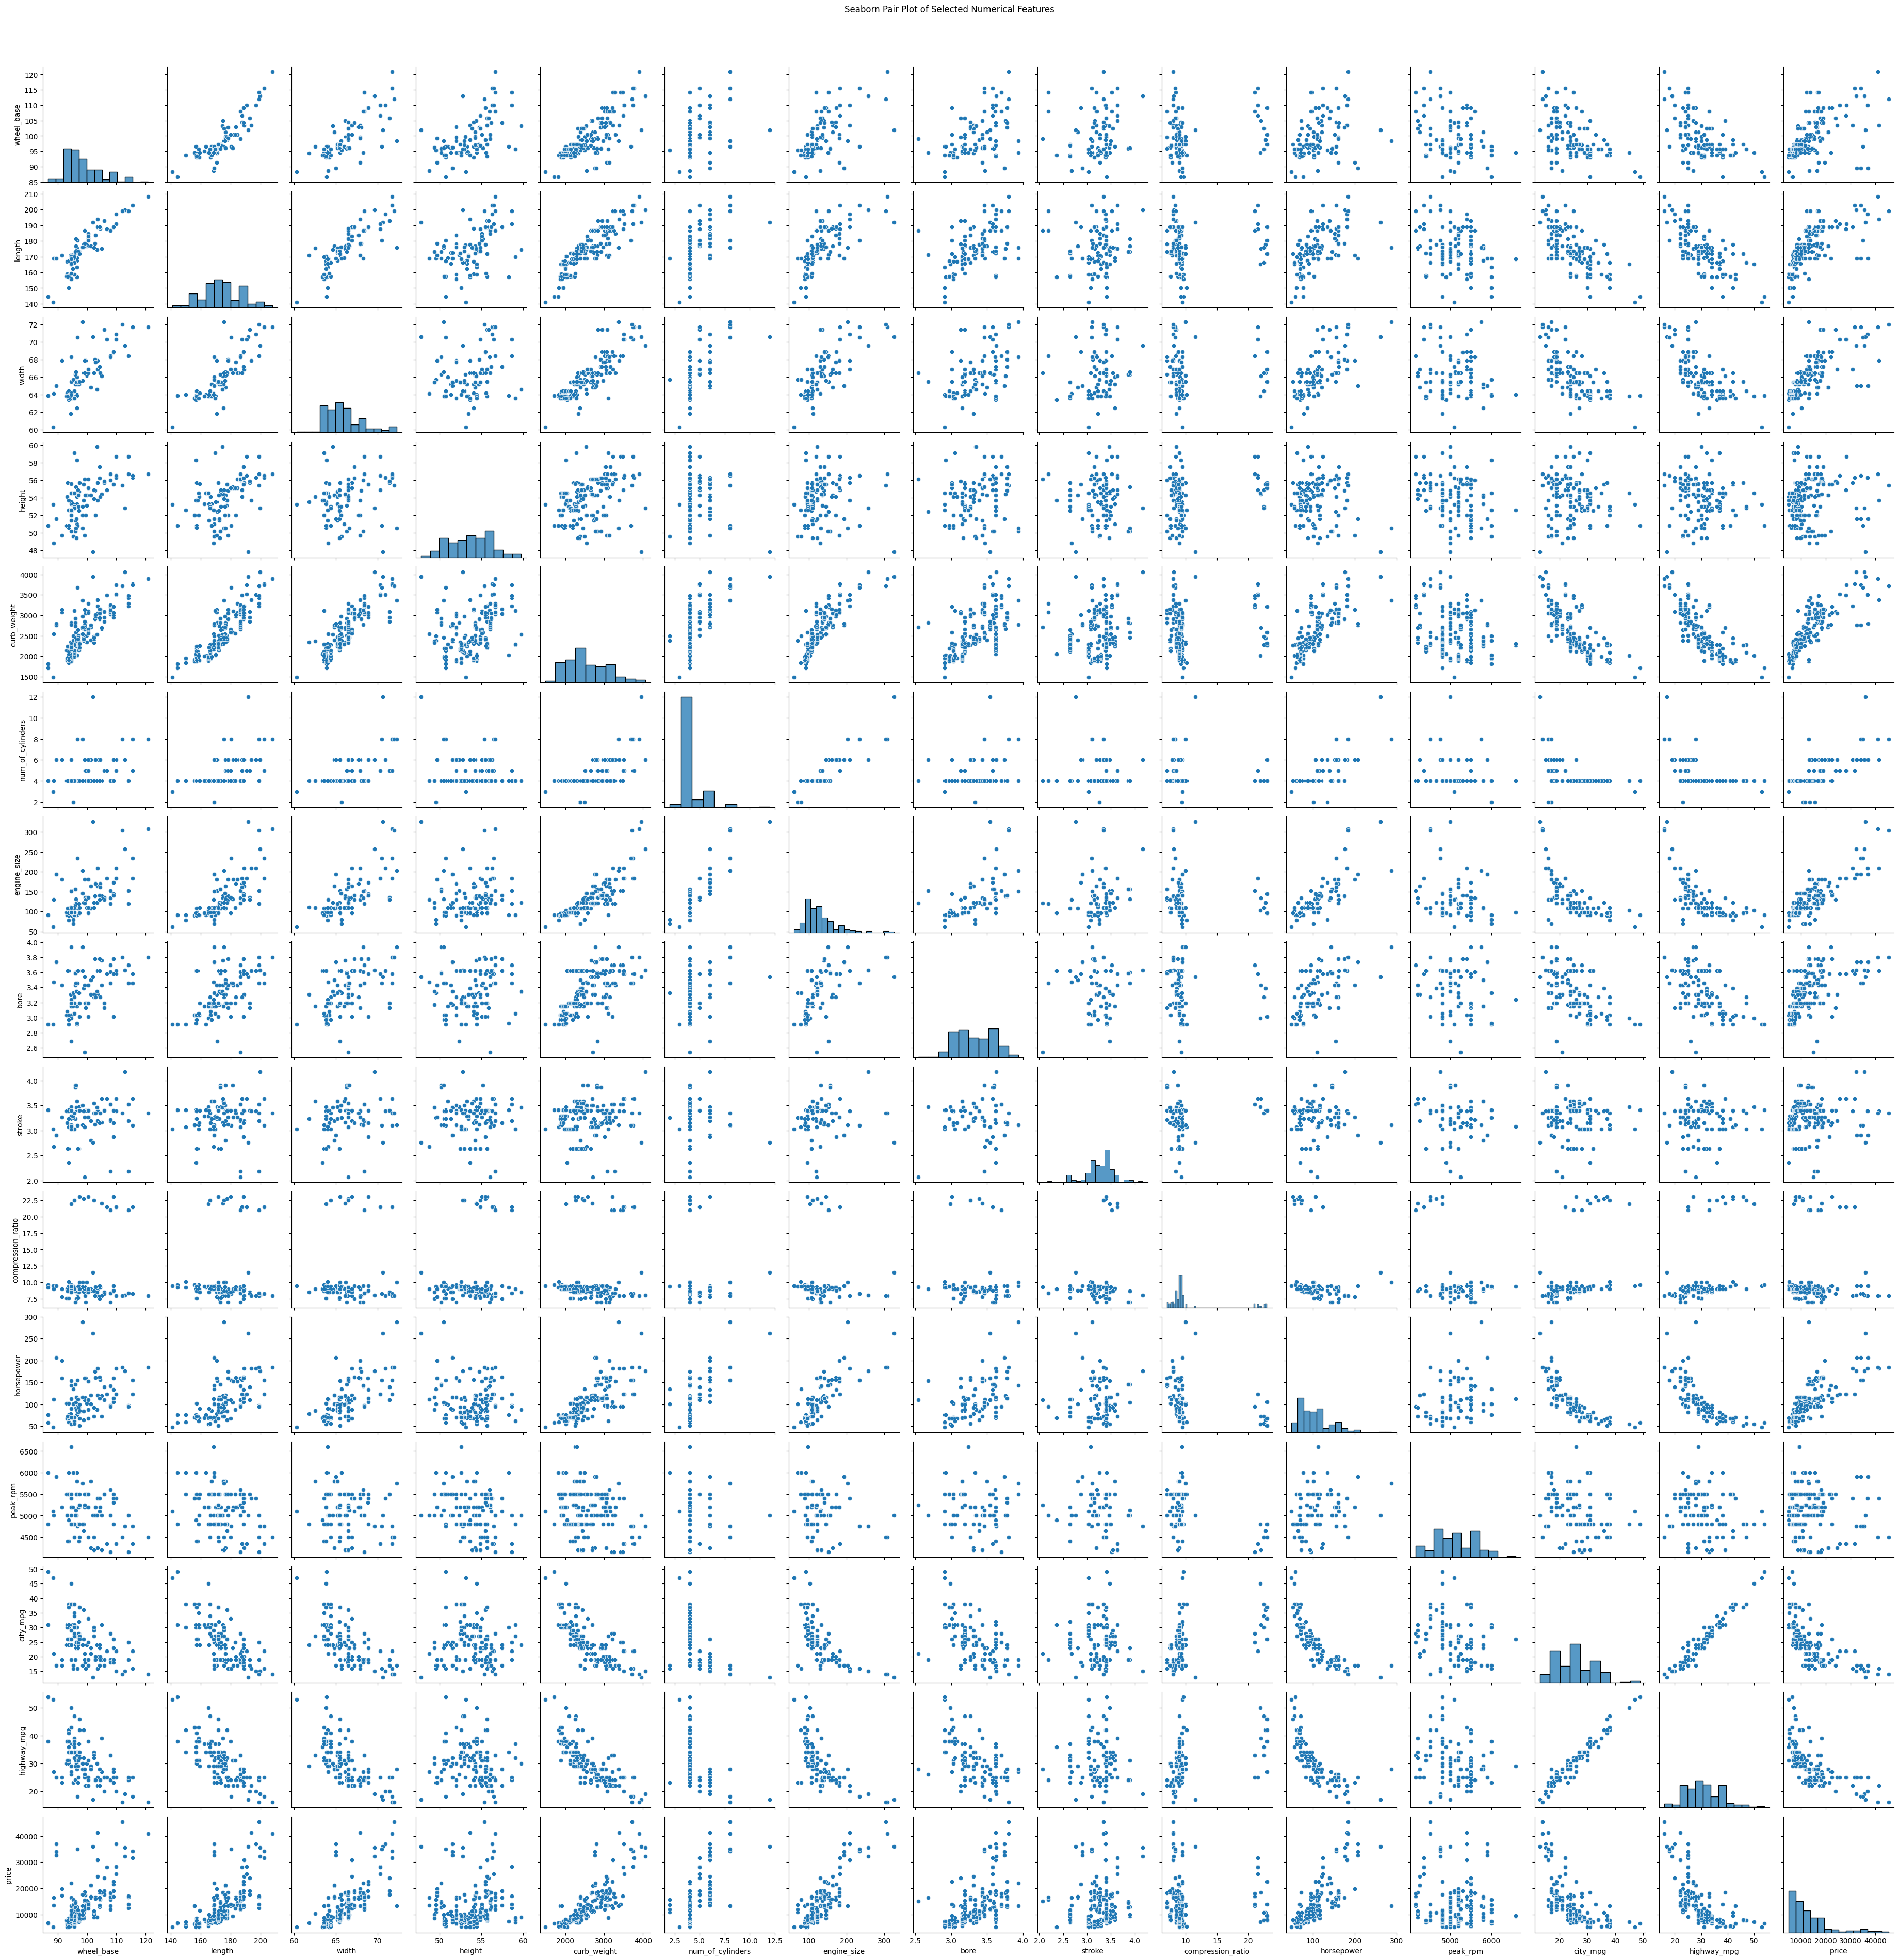

In [16]:
sns.pairplot(numerical_df)
plt.suptitle('Seaborn Pair Plot of Selected Numerical Features', y=1.02)
plt.show()